In [3]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import entropy
from scipy.stats import norm
from scipy.stats import poisson

In [4]:
def js(p, q):
    p1 = p / np.linalg.norm(p, ord=1)
    q1 = q / np.linalg.norm(q, ord=1)
    m = 0.5 * (p1 + q1)
    r = 0.5 * (entropy(p1, m) + entropy(q1, m))
    return r

In [7]:
whData = pd.read_csv('weight-height.csv')
whData.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [9]:
ideal = norm.rvs(size=len(whData['Height']), loc=whData['Height'].mean(), scale=whData['Height'].std())
icount, idivision = np.histogram(ideal, bins=100)

In [10]:
count, division = np.histogram(whData['Height'], bins=100)

In [11]:
js(count, icount)

0.014430829553534932

In [17]:
wsData = pd.read_csv('wind_speed_laurel_nebraska.csv')
wsData.head()

,10 Min Std Dev,Time,10 Min Sampled Avg
0,2.73,2001-06-11 11:00,22.3
1,1.98,2001-06-11 11:10,23.0
2,1.87,2001-06-11 11:20,23.3
3,2.03,2001-06-11 11:30,22.0
4,3.10,2001-06-11 11:40,20.5


In [23]:
ideal = norm.rvs(size=len(wsData['10 Min Sampled Avg']), loc=wsData['10 Min Sampled Avg'].mean(), scale=wsData['10 Min Sampled Avg'].std())
icount, idivision = np.histogram(ideal, bins=100)

In [21]:
count, division = np.histogram(wsData['10 Min Sampled Avg'], bins=100)

In [24]:
js(count, icount)

0.17061599545234316

<AxesSubplot:>

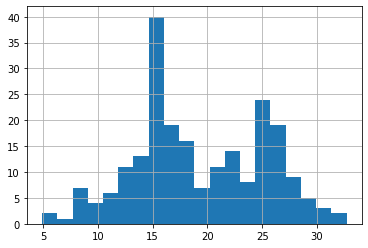

In [28]:
wsData['10 Min Sampled Avg'].hist(bins=20)

In [31]:
sData = pd.read_csv('soccer.csv')
sData.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [35]:
sData['total_score'] = sData['home_score'] + sData['away_score']
sData.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_score
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3


In [36]:
ideal = norm.rvs(size=len(sData['total_score']), loc=sData['total_score'].mean(), scale=sData['total_score'].std())
icount, idivision = np.histogram(ideal, bins=100)

In [37]:
count, division = np.histogram(sData['total_score'], bins=100)

In [38]:
js(count, icount)

0.6722991286529022

In [55]:
ideal = st.distributions.poisson.rvs(size=len(sData['total_score']), mu=sData['total_score'].mean()-1)
icount, idivision = np.histogram(ideal, bins=40)

In [53]:
count, division = np.histogram(sData['total_score'], bins=40)

In [56]:
js(count, icount)

0.6189383403939795

<AxesSubplot:>

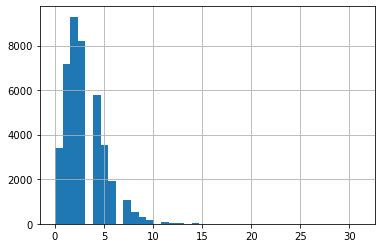

In [51]:
sData['total_score'].hist(bins=40)